## Ex 3

In [1]:
id1 = "332391820"
id2 = "313475808"

name_student_1 = "Noam Sitbon"
name_student_2 = "Yedidia Friedheim"

import pandas as pd
df = pd.DataFrame([name_student_1 + " , " + id1 ,name_student_2 + " , " + id2 ])
df.to_clipboard(index=False,header=False)
df

,0
0,"Noam Sitbon , 332391820"
1,"Yedidia Friedheim , 313475808"


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
url="https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv"
youtube=pd.read_csv(url)
youtube.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
12840,0eUk_VN3e2A,18.19.01,ASMR Lushful Spa Treatment ✨ Facial and Massage,ASMR Darling,24,2018-01-17T03:24:25.000Z,"taylor darling|""asmr darling""|""tingles""|""spa""|...",785084,23712,1591,6812,https://i.ytimg.com/vi/0eUk_VN3e2A/default.jpg,False,False,False,Hello beautiful people! Sit back and enjoy the...
12841,V0HCZ4YGqbw,18.19.01,La de da de da de da de day oh,bill wurtz,22,2018-01-16T20:34:48.000Z,"bill wurtz|""song""|""music""|""la de da de da de d...",2297342,237488,5337,27517,https://i.ytimg.com/vi/V0HCZ4YGqbw/default.jpg,False,False,False,http://billwurtz.com\n\n\n\npatreon: http://p...
12842,n08glcqdMRY,18.19.01,How to be a Pisces,Sailor J,23,2018-01-17T23:28:57.000Z,"How To|""Makeup""|""Zodiac""|""Blue""|""Eyeshadow""|""T...",112969,9459,288,1866,https://i.ytimg.com/vi/n08glcqdMRY/default.jpg,False,False,False,Which sign should I do next??\n\nCome find me ...
12843,HbNYuOTaYFs,18.19.01,I Bought The $80 Starbucks Mug...,Dave Lee,28,2018-01-17T22:33:30.000Z,"Dave2D|""Review""|""dave lee""|""mug""|""cup""|""coffee...",275653,11167,637,1269,https://i.ytimg.com/vi/HbNYuOTaYFs/default.jpg,False,False,False,Dave2D review of the Ember ceramic mug sold at...
12844,GZMrivD2Aok,18.19.01,Queer Eye | Official Trailer [HD] | Netflix,Netflix,24,2018-01-17T15:00:02.000Z,"Netflix|""Trailer""|""Netflix Original Series""|""N...",238333,3282,1629,875,https://i.ytimg.com/vi/GZMrivD2Aok/default.jpg,False,False,False,"With a new Fab 5 and some very tough missions,..."


## Question 1

In [1]:
max_view=youtube["views"].max() #Find the maximum view's video
row_max_view=youtube.loc[youtube['views'] == max_view] #Find location of max view in column "views"
row_max_view[["title","publish_time","views"]]


NameError: name 'youtube' is not defined

## Question 2

In [20]:
channels_max=youtube.groupby("channel_title")[["views"]].sum() #find the sum of views by channel title
channels_max.sort_values("views",ascending=False)[0:3] # sort the data and print the 3 biggest values

,views
channel_title,
YouTube Spotlight,783298628
Marvel Entertainment,679590872
LuisFonsiVEVO,534738794


## Question 3

In [21]:
youtube[['likes', 'dislikes',"views","comment_count"]].corr(method='spearman') #making correlation with spearman

,likes,dislikes,views,comment_count
likes,1.000000,0.801154,0.877789,0.881849
dislikes,0.801154,1.000000,0.866979,0.843331
views,0.877789,0.866979,1.000000,0.840532
comment_count,0.881849,0.843331,0.840532,1.000000


## Question 4

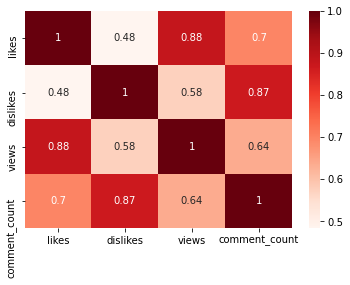

In [22]:
features=['likes', 'dislikes',"views","comment_count"] 
correlation_matrix = youtube[features].corr() #making correlation with features
sns.heatmap(data=correlation_matrix,cmap='Reds', annot=True)

## Question 5

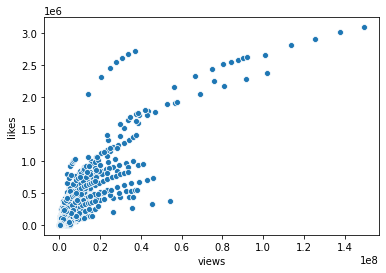

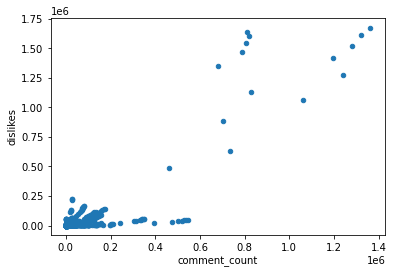

In [8]:
sns.scatterplot(data=youtube, x='views', y='likes') #making scatterplot with "views" and "likes"
youtube.plot.scatter(x='comment_count', y='dislikes') #making scatterplot with "comment_count" and "dislikes"

## Question 6

In [56]:
youtube["publish_time"]=pd.to_datetime(youtube.publish_time) 
youtube["year"]=pd.DatetimeIndex(youtube.publish_time).year #add column year
new_data=youtube[youtube["year"].isin([2017,2018])] #slicing the data by year 2017,2018

new_data.pivot_table("views", index="category_id",columns="year",  aggfunc = 'sum') #sum video's view  by category in 2017 and 2018

year,2017,2018
category_id,,
1,8.654615e+08,144072937.0
2,7.885352e+07,8047346.0
10,4.504741e+09,839810930.0
15,1.442459e+08,32629265.0
17,3.812432e+08,61660329.0
19,5.429144e+07,7583452.0
20,5.035442e+07,84176667.0
22,7.018258e+08,67849434.0
23,1.130782e+09,197147385.0
